In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

# Read in the data for the analysis

 The analysis will read in
 - Booster installation information
 - Site information/data

In [204]:
#read in the data

df_boosters = pd.read_excel("SGS_Cell-Extender.xlsx")
df_sites = pd.read_excel("SGS_Site_List_20230802.xlsx")

In [205]:
df_boosters.head()

,RoproProjectID,SecondCutRefID,RemedyRefID,ProjectSubType,RequestedBy,RequestedDate,CreatedBy,CreatedOn,Status,ProjectStatus,...,Latitude,Longitude,CBU/EBU,EquipmentType,TrialDate,MSISDN,Segment,CompanyName,AccountNumber,AverageSpend
0,A36QEV,INC0N0013121717,INC0N0013121717,CELL_EXTENDER,Stephen Ramalepa,2023-07-14,ramalest,2023-07-14,Open,O,...,-26.304840,28.196073,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2023-07-12,0795817752,NaN,NaN,NaN,NaN
1,A36QDI,INC0N0012981409,INC0N0012981409,CELL_EXTENDER,Sipho Tshelane,2023-07-05,tshelanes,2023-07-05,Open,O,...,-26.350424,28.105366,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,0761687785,NaN,NaN,NaN,NaN
2,A36QD8,INC0N0013024776,INC0N0013024776,CELL_EXTENDER,Sipho Tshelane,2023-07-03,tshelanes,2023-07-03,Open,O,...,-26.272593,28.027592,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,0713785431,NaN,NaN,NaN,667.3454
3,A36QD6,INC0N0013035579,INC0N0013035579,CELL_EXTENDER,Sipho Tshelane,2023-07-03,tshelanes,2023-07-03,Open,O,...,-26.177059,28.032081,NaN,Cel-Fi Go-X,2023-06-27,0824433330,Medium Enterprises,TIM DU TOIT & KIE,N2682957,2906.0386
4,A36QD5,INC0N0012837167,INC0N0012837167,CELL_EXTENDER,Sipho Tshelane,2023-07-03,tshelanes,2023-07-03,Open,O,...,-26.183005,28.562718,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,0837774447,Medium Enterprises,GROUND WATER PRAC,B0023782,1539.7562


# Data Cleaning and Preparation

In [206]:
df_sites.head()

,Site_ID,Site_Name,Lat,Long,First Live,County
0,NaN,19_011_0973_Protea_Glen_VOD_SGS,,,2021/12/02 00:00:00,Deep South
1,NaN,19_011_1497_Klipspruit_West_VOD_SGS,,,2020/05/15 00:00:00,Deep South
2,NaN,19_011_4299_Monaghan_Tempest_VOD_SGS,,,2021/03/20 00:00:00,UNK
3,NaN,19_011_4560_Dawn_Park_Ext_7_VOD_SGS,,,2022/03/25 00:00:00,UNK
4,NaN,RAN_Coetzee_SGS,,,2022/01/14 00:00:00,Deep South


In [207]:
df_sites = df_sites.replace(r'^\s*$', np.nan, regex=True)
df_boosters = df_boosters.replace(r'^\s*$', np.nan, regex=True)

In [208]:
# remove spaces on the column name and replace with underscore

df_sites.columns = df_sites.columns.str.replace(' ', '_')  

In [209]:
#remove rows where First_Live is empty
indexFirstLive = df_sites[df_sites['First_Live'].isna()].index
df_sites.drop(indexFirstLive , inplace=True)

In [210]:
df_sites.isna().value_counts()

Site_ID  Site_Name  Lat    Long   First_Live  County
False    False      False  False  False       False     6419
True     False      True   True   False       False       12
Name: count, dtype: int64

In [211]:
#delete rows with null site ids

df_sites = df_sites.dropna(subset=['Site_ID'], axis="index") 

In [212]:
df_sites.head()

,Site_ID,Site_Name,Lat,Long,First_Live,County
12,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2016/12/03 00:00:00,Jozi West
13,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2016/12/14 00:00:00,Jozi West
14,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2018/08/11 00:00:00,Jozi West
15,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2020/09/01 00:00:00,Jozi West
16,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2020/09/23 00:00:00,Jozi West


In [213]:
df_sites.isna().value_counts()

Site_ID  Site_Name  Lat    Long   First_Live  County
False    False      False  False  False       False     6419
Name: count, dtype: int64

In [214]:
#Count rows with nulls
df_boosters.isna().value_counts().sum()

1056

In [215]:
df_boosters.columns

Index(['RoproProjectID', 'SecondCutRefID', 'RemedyRefID', 'ProjectSubType',
       'RequestedBy', 'RequestedDate', 'CreatedBy', 'CreatedOn', 'Status',
       'ProjectStatus', 'Region', 'County', 'CurrentTask', 'CurrentQueue',
       'CurrentTaskCreated', 'LastUpdatedBy', 'LastUpdatedDate', 'ClientName',
       'ClientNumber', 'ClientAddress', 'Latitude', 'Longitude', 'CBU/EBU',
       'EquipmentType', 'TrialDate', 'MSISDN', 'Segment', 'CompanyName',
       'AccountNumber', 'AverageSpend'],
      dtype='object')

In [216]:
#Drop columns not to be used for the analysis

df_boosters = df_boosters.drop(columns=['RoproProjectID','RemedyRefID', 'ProjectSubType', 
                                       'RequestedBy', 'CreatedOn',
                                       'ProjectStatus', 'CurrentTask', 'CurrentQueue', 'CurrentTaskCreated', 
                                       'LastUpdatedBy', 'LastUpdatedDate', 'ClientName', 'ClientNumber', 'ClientAddress',
                                       'MSISDN', 'Segment', 'CompanyName', 'AccountNumber', 'AverageSpend'])

In [217]:
df_boosters.head()

,SecondCutRefID,RequestedDate,CreatedBy,Status,Region,County,Latitude,Longitude,CBU/EBU,EquipmentType,TrialDate
0,INC0N0013121717,2023-07-14,ramalest,Open,SGS,SGS_EA,-26.304840,28.196073,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2023-07-12
1,INC0N0012981409,2023-07-05,tshelanes,Open,SGS,SGS_EA,-26.350424,28.105366,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28
2,INC0N0013024776,2023-07-03,tshelanes,Open,SGS,SGS_WE,-26.272593,28.027592,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28
3,INC0N0013035579,2023-07-03,tshelanes,Open,SGS,SGS_WE,-26.177059,28.032081,NaN,Cel-Fi Go-X,2023-06-27
4,INC0N0012837167,2023-07-03,tshelanes,Open,SGS,SGS_EA,-26.183005,28.562718,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28


In [218]:
df_sites.head()

,Site_ID,Site_Name,Lat,Long,First_Live,County
12,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2016/12/03 00:00:00,Jozi West
13,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2016/12/14 00:00:00,Jozi West
14,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2018/08/11 00:00:00,Jozi West
15,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2020/09/01 00:00:00,Jozi West
16,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2020/09/23 00:00:00,Jozi West


In [219]:
#Keep the latest first live date

df_sites = df_sites.sort_values('First_Live').drop_duplicates('Site_ID',keep='last') 

In [220]:
df_sites.query("Site_ID == 'SGS_1001'")

,Site_ID,Site_Name,Lat,Long,First_Live,County
16,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2020/09/23 00:00:00,Jozi West


In [221]:
df_sites.head(10)

,Site_ID,Site_Name,Lat,Long,First_Live,County
2961,SGS_23861,LTE_Apex_MN1_GSMT01_SGS,-26.210227,28.336973,2014/04/18 00:00:00,Far East
1105,SGS_14391,RAN_Std_Bank_3_DAS_SGS,-26.208946,28.039718,2014/04/25 00:00:00,Jozi West
4742,SGS_41181,RAN_BDO_House_DAS_SGS,-26.184852,28.036953,2014/08/29 00:00:00,Jozi West
870,SGS_13281,RAN_ABSA_Towers_DAS_SGS,-26.205888,28.050278,2014/11/12 00:00:00,Jozi West
3580,SGS_28581,RAN_222_Smit_Str_DAS_SGS,-26.194922,28.041226,2015/03/27 00:00:00,Jozi West
2579,SGS_2141,RAN_Alberton_Mall_DAS_SGS,-26.267974,28.121634,2015/05/16 00:00:00,Far East
2820,SGS_22581,LTE_Emerald_Casino_GSMT01_SGS,-26.743577,27.855949,2015/05/31 00:00:00,Deep South
4621,SGS_40028,LTE_Anglo_Coal_MN1_GSMT01_SGS,-26.729694,27.960138,2015/06/03 00:00:00,Deep South
4798,SGS_41521,LTE_Garden_City_Clinic_DAS_GSMT01_SGS,-26.197307,28.004057,2015/06/11 00:00:00,Jozi West
6398,SGS_6711,LTE_Ratanda_GSMT01_SGS,-26.641694,28.279750,2015/06/26 00:00:00,Far East


In [222]:
#Sort the data by the Site_ID column

df_sites = df_sites.sort_values('Site_ID', ascending=True)

In [223]:
df_sites.head()

,Site_ID,Site_Name,Lat,Long,First_Live,County
16,SGS_1001,RAN_Golden_Hen_SGS,-25.976379,27.852592,2020/09/23 00:00:00,Jozi West
18,SGS_10010,RAN_Ngonyama_Lodge_MN1_SGS,-26.079250,27.717138,2019/01/29 00:00:00,Jozi West
22,SGS_10011,RAN_JG_Strydom_SGS,-26.186708,28.049186,2020/10/15 00:00:00,Jozi West
27,SGS_10051,RAN_JHB_Central_SGS,-26.201572,28.044614,2020/09/19 00:00:00,Jozi West
29,SGS_10060,RAN_PPC_Parktown_MN1_SGS,-26.179090,28.032740,2019/10/22 00:00:00,Jozi West


In [224]:
df_sites.dtypes

Site_ID        object
Site_Name      object
Lat           float64
Long          float64
First_Live     object
County         object
dtype: object

In [225]:
df_sites.columns

Index(['Site_ID', 'Site_Name', 'Lat', 'Long', 'First_Live', 'County'], dtype='object')

In [226]:
df_boosters.columns

Index(['SecondCutRefID', 'RequestedDate', 'CreatedBy', 'Status', 'Region',
       'County', 'Latitude', 'Longitude', 'CBU/EBU', 'EquipmentType',
       'TrialDate'],
      dtype='object')

In [227]:
# Renaming the column names 
df_boosters=df_boosters.rename(columns = {'Latitude':'lat','Longitude':'lon'})
df_sites=df_sites.rename(columns = {'Lat':'lat','Long':'lon'})
# To make sure that there are no null values and All are either integers/ Float values 
df_boosters.info() 
print('\n XXXXXXXXXXXXXXXXXXXXXXX\n')
df_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SecondCutRefID  1056 non-null   object 
 1   RequestedDate   1056 non-null   object 
 2   CreatedBy       1056 non-null   object 
 3   Status          1056 non-null   object 
 4   Region          1056 non-null   object 
 5   County          1056 non-null   object 
 6   lat             1056 non-null   float64
 7   lon             1056 non-null   float64
 8   CBU/EBU         869 non-null    object 
 9   EquipmentType   1056 non-null   object 
 10  TrialDate       1056 non-null   object 
dtypes: float64(2), object(9)
memory usage: 90.9+ KB

 XXXXXXXXXXXXXXXXXXXXXXX

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 16 to 6455
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Site_ID     1681 non-null   object 
 1 

# Feature Engineering

In [228]:
#covert date columns to datetime type for comparison
df_boosters['TrialDate'] = pd.to_datetime(df_boosters['TrialDate'])
df_sites['First_Live'] = pd.to_datetime(df_sites['First_Live'])

In [229]:
df_boosters['Trial_Year'] = pd.DatetimeIndex(df_boosters['TrialDate']).year
df_sites['First_Live_Year'] = pd.DatetimeIndex(df_sites['First_Live']).year

# Data Visualization

<Axes: xlabel='County', ylabel='Count'>

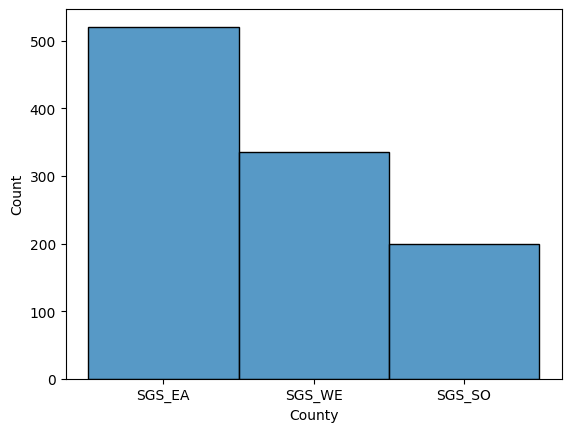

In [230]:
#The number of boosters that per county that were deployed before the closest site came live
sns.histplot(data=df_boosters, x='County')

<Axes: xlabel='distance'>

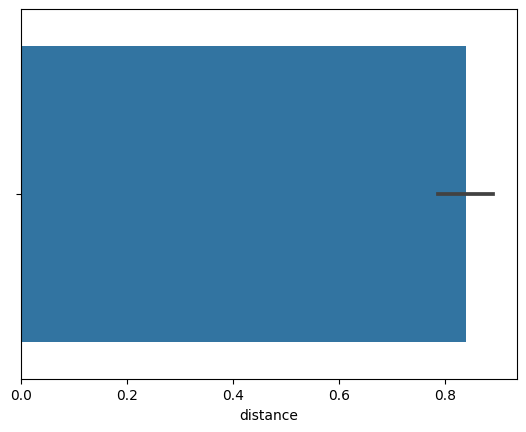

In [231]:
sns.barplot(data=df_rec, x='distance')

<Axes: xlabel='Trial_Year', ylabel='Count'>

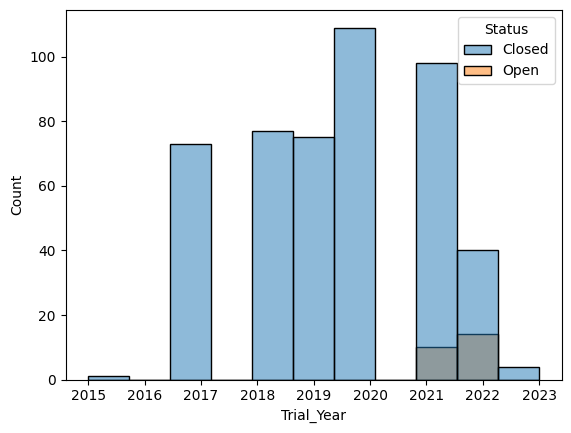

In [232]:
#Hist plot to show which years we have trials done for boosters
sns.histplot(data=df_rec, x = 'Trial_Year', hue='Status')

<Axes: xlabel='First_Live_Year', ylabel='Count'>

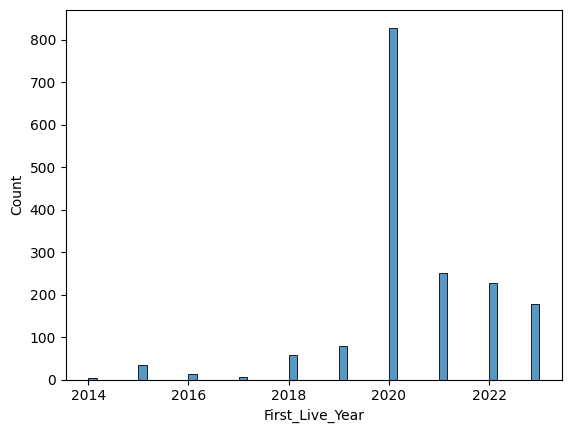

In [233]:
#Hist plot ot show which years we have the sites coming live or upgraded with new layers
sns.histplot(data=df_sites, x = 'First_Live_Year')

<Axes: xlabel='County', ylabel='First_Live_Year'>

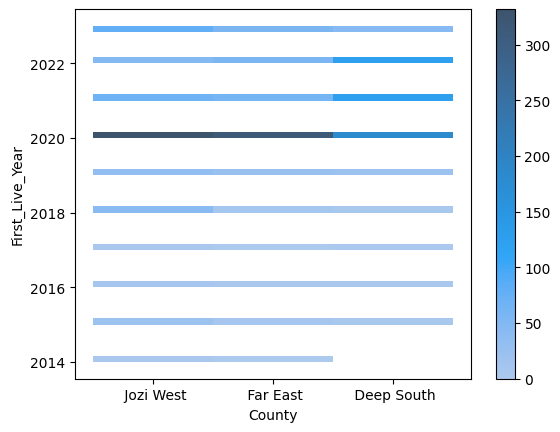

In [255]:
#Histplot showing the concentration of the upgrades
sns.histplot(data=df_sites, x = 'County', y = 'First_Live_Year', cbar=True)

<Axes: xlabel='County_y', ylabel='Percent'>

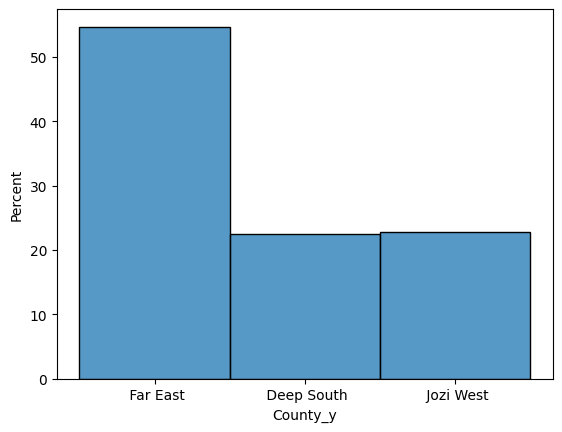

In [235]:
#Histplot showing the data per county
sns.histplot(data=df_rec, x = 'County_y', stat='percent')

# Analysis / Calculations

In [236]:
#Calcualte the distances between a booster and a site

from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [237]:
#The shortest distance between a booster and a site

def find_nearest(lat, long):
    distances = df_sites.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), axis=1)
    return df_sites.loc[distances.idxmin(), 'Site_ID']


In [238]:
df_boosters['Site_ID'] = df_boosters.apply(
    lambda row: find_nearest(row['lat'], row['lon']), axis=1)

# To check the data frame if it has a new column of booster name (for each and every site's location in the list)
df_boosters.head()

,SecondCutRefID,RequestedDate,CreatedBy,Status,Region,County,lat,lon,CBU/EBU,EquipmentType,TrialDate,Trial_Year,Site_ID
0,INC0N0013121717,2023-07-14,ramalest,Open,SGS,SGS_EA,-26.304840,28.196073,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2023-07-12,2023,SGS_16691
1,INC0N0012981409,2023-07-05,tshelanes,Open,SGS,SGS_EA,-26.350424,28.105366,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_56841
2,INC0N0013024776,2023-07-03,tshelanes,Open,SGS,SGS_WE,-26.272593,28.027592,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_42781
3,INC0N0013035579,2023-07-03,tshelanes,Open,SGS,SGS_WE,-26.177059,28.032081,NaN,Cel-Fi Go-X,2023-06-27,2023,SGS_27441
4,INC0N0012837167,2023-07-03,tshelanes,Open,SGS,SGS_EA,-26.183005,28.562718,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_11481


In [239]:
df_boosters.columns

Index(['SecondCutRefID', 'RequestedDate', 'CreatedBy', 'Status', 'Region',
       'County', 'lat', 'lon', 'CBU/EBU', 'EquipmentType', 'TrialDate',
       'Trial_Year', 'Site_ID'],
      dtype='object')

In [240]:
df_boosters.head()

,SecondCutRefID,RequestedDate,CreatedBy,Status,Region,County,lat,lon,CBU/EBU,EquipmentType,TrialDate,Trial_Year,Site_ID
0,INC0N0013121717,2023-07-14,ramalest,Open,SGS,SGS_EA,-26.304840,28.196073,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2023-07-12,2023,SGS_16691
1,INC0N0012981409,2023-07-05,tshelanes,Open,SGS,SGS_EA,-26.350424,28.105366,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_56841
2,INC0N0013024776,2023-07-03,tshelanes,Open,SGS,SGS_WE,-26.272593,28.027592,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_42781
3,INC0N0013035579,2023-07-03,tshelanes,Open,SGS,SGS_WE,-26.177059,28.032081,NaN,Cel-Fi Go-X,2023-06-27,2023,SGS_27441
4,INC0N0012837167,2023-07-03,tshelanes,Open,SGS,SGS_EA,-26.183005,28.562718,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_11481


In [241]:
#Create a merged DataFrame with the booster and sites dataframes

df_rec = df_boosters.merge(df_sites, left_on='Site_ID', right_on='Site_ID')

In [242]:
df_rec.head()

,SecondCutRefID,RequestedDate,CreatedBy,Status,Region,County_x,lat_x,lon_x,CBU/EBU,EquipmentType,TrialDate,Trial_Year,Site_ID,Site_Name,lat_y,lon_y,First_Live,County_y,First_Live_Year
0,INC0N0013121717,2023-07-14,ramalest,Open,SGS,SGS_EA,-26.304840,28.196073,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2023-07-12,2023,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020
1,CE INC000017111947,2020-04-20,patilv02,Closed,SGS,SGS_EA,-26.308023,28.191305,CBU,Vodafone 3G,2020-03-17,2020,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020
2,CE INC000007101498,2017-07-12,patilv02,Closed,SGS,SGS_EA,-26.309483,28.179915,CBU,Vodafone 3G,2017-06-28,2017,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020
3,INC0N0012981409,2023-07-05,tshelanes,Open,SGS,SGS_EA,-26.350424,28.105366,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_56841,RAN_Royal_Private_Schl_SGS,-26.358772,28.103798,2021-02-20,Far East,2021
4,CE INC0N0000745553,2020-09-07,patilv02,Closed,SGS,SGS_EA,-26.357896,28.102788,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2020-08-12,2020,SGS_56841,RAN_Royal_Private_Schl_SGS,-26.358772,28.103798,2021-02-20,Far East,2021


In [243]:

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# Creating a new column to generate the output by passing lat long information to Haversine Equation
df_rec['distance'] = [haversine(df_rec.lon_x[i],df_rec.lat_x[i],df_rec.lon_y[i],df_rec.lat_y[i]) for i in range(len(df_rec))]
df_rec['distance'] = df_rec['distance'].round(decimals=3)
# Printing the data table 
df_rec.head()

,SecondCutRefID,RequestedDate,CreatedBy,Status,Region,County_x,lat_x,lon_x,CBU/EBU,EquipmentType,TrialDate,Trial_Year,Site_ID,Site_Name,lat_y,lon_y,First_Live,County_y,First_Live_Year,distance
0,INC0N0013121717,2023-07-14,ramalest,Open,SGS,SGS_EA,-26.304840,28.196073,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2023-07-12,2023,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020,0.861
1,CE INC000017111947,2020-04-20,patilv02,Closed,SGS,SGS_EA,-26.308023,28.191305,CBU,Vodafone 3G,2020-03-17,2020,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020,0.331
2,CE INC000007101498,2017-07-12,patilv02,Closed,SGS,SGS_EA,-26.309483,28.179915,CBU,Vodafone 3G,2017-06-28,2017,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020,0.833
3,INC0N0012981409,2023-07-05,tshelanes,Open,SGS,SGS_EA,-26.350424,28.105366,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_56841,RAN_Royal_Private_Schl_SGS,-26.358772,28.103798,2021-02-20,Far East,2021,0.941
4,CE INC0N0000745553,2020-09-07,patilv02,Closed,SGS,SGS_EA,-26.357896,28.102788,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2020-08-12,2020,SGS_56841,RAN_Royal_Private_Schl_SGS,-26.358772,28.103798,2021-02-20,Far East,2021,0.140


In [244]:
df_rec.head(10)

,SecondCutRefID,RequestedDate,CreatedBy,Status,Region,County_x,lat_x,lon_x,CBU/EBU,EquipmentType,TrialDate,Trial_Year,Site_ID,Site_Name,lat_y,lon_y,First_Live,County_y,First_Live_Year,distance
0,INC0N0013121717,2023-07-14,ramalest,Open,SGS,SGS_EA,-26.304840,28.196073,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2023-07-12,2023,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020,0.861
1,CE INC000017111947,2020-04-20,patilv02,Closed,SGS,SGS_EA,-26.308023,28.191305,CBU,Vodafone 3G,2020-03-17,2020,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020,0.331
2,CE INC000007101498,2017-07-12,patilv02,Closed,SGS,SGS_EA,-26.309483,28.179915,CBU,Vodafone 3G,2017-06-28,2017,SGS_16691,RAN_Leondale_SGS,-26.307621,28.188010,2020-09-12,Far East,2020,0.833
3,INC0N0012981409,2023-07-05,tshelanes,Open,SGS,SGS_EA,-26.350424,28.105366,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_56841,RAN_Royal_Private_Schl_SGS,-26.358772,28.103798,2021-02-20,Far East,2021,0.941
4,CE INC0N0000745553,2020-09-07,patilv02,Closed,SGS,SGS_EA,-26.357896,28.102788,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2020-08-12,2020,SGS_56841,RAN_Royal_Private_Schl_SGS,-26.358772,28.103798,2021-02-20,Far East,2021,0.140
5,INC0N0013024776,2023-07-03,tshelanes,Open,SGS,SGS_WE,-26.272593,28.027592,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_42781,RAN_Maritz_St_LP_SGS,-26.272002,28.025467,2020-02-08,Far East,2020,0.222
6,CE INC0N0002292638,2021-02-27,patilv02,Closed,SGS,SGS_EA,-26.268377,28.030016,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2021-02-18,2021,SGS_42781,RAN_Maritz_St_LP_SGS,-26.272002,28.025467,2020-02-08,Far East,2020,0.607
7,INC0N0013035579,2023-07-03,tshelanes,Open,SGS,SGS_WE,-26.177059,28.032081,NaN,Cel-Fi Go-X,2023-06-27,2023,SGS_27441,RAN_Sony_BMG_MN1_SGS,-26.176556,28.030750,2021-05-08,Jozi West,2021,0.144
8,INC0N0012837167,2023-07-03,tshelanes,Open,SGS,SGS_EA,-26.183005,28.562718,NaN,Cel-Fi Duo Dual-Band Smart Repeater,2023-06-28,2023,SGS_11481,RAN_Sundra_SGS,-26.185277,28.546112,2020-09-15,Far East,2020,1.676
9,INC0N0010509989,2023-02-09,marimall,Closed,SGS,SGS_EA,-26.185095,28.545916,Completed,Cel-Fi Duo Dual-Band Smart Repeater,2023-01-31,2023,SGS_11481,RAN_Sundra_SGS,-26.185277,28.546112,2020-09-15,Far East,2020,0.028


In [245]:
df_rec.query("Site_ID =='SGS_56381'")

,SecondCutRefID,RequestedDate,CreatedBy,Status,Region,County_x,lat_x,lon_x,CBU/EBU,EquipmentType,TrialDate,Trial_Year,Site_ID,Site_Name,lat_y,lon_y,First_Live,County_y,First_Live_Year,distance
328,INC0N0009355557,2022-12-01,marimall,Closed,SGS,SGS_EA,-26.254979,28.402618,CBU,Cel-Fi Duo Dual-Band Smart Repeater,2022-11-23,2022,SGS_56381,RAN_Wright_Park_SGS,-26.2611,28.4003,2022-07-01,Far East,2022,0.719
329,CE INC000010571845,2018-08-03,patilv02,Closed,SGS,SGS_EA,-26.257645,28.400178,CBU,Vodafone 3G,2018-07-04,2018,SGS_56381,RAN_Wright_Park_SGS,-26.2611,28.4003,2022-07-01,Far East,2022,0.384


<Axes: xlabel='distance'>

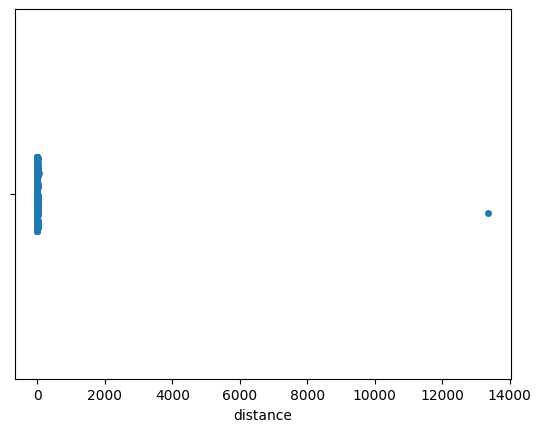

In [246]:
#Plot shows the clutter of the distances from the sites
sns.stripplot(data=df_rec, x = 'distance')

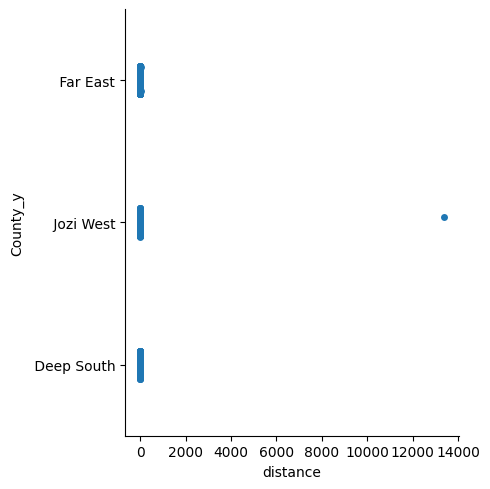

In [247]:
#Catplot showing the distances between boosters and sites upgraded
sns.catplot(data=df_rec, x = 'distance', y = 'County_y')

In [248]:
#Deal with outliers using IQR
q1=df_rec['distance'].quantile(0.25)
q3=df_rec['distance'].quantile(0.75)
iqr=q3-q1

upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit, upper_limit 

df_rec.loc[(df_rec['distance']>upper_limit)|(df_rec['distance']<lower_limit)]

#capping-change the outlier values to upper(or) Lower values
df_rec.loc[df_rec['distance']>upper_limit,'distance']=upper_limit
df_rec.loc[df_rec['distance']<lower_limit,'distance']=lower_limit

<Axes: xlabel='distance'>

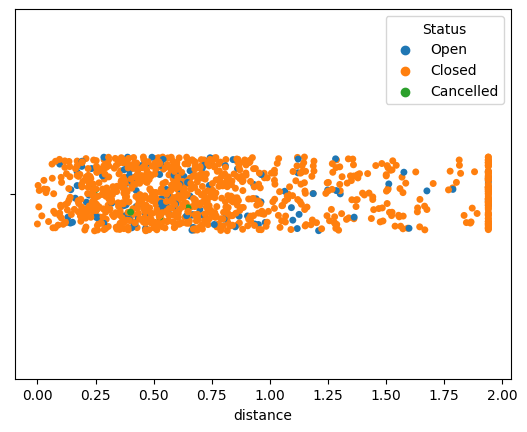

In [249]:
#Plot shows the clutter of the distances from the sites - Post the outliers management
sns.stripplot(data=df_rec, x = 'distance', hue = 'Status')

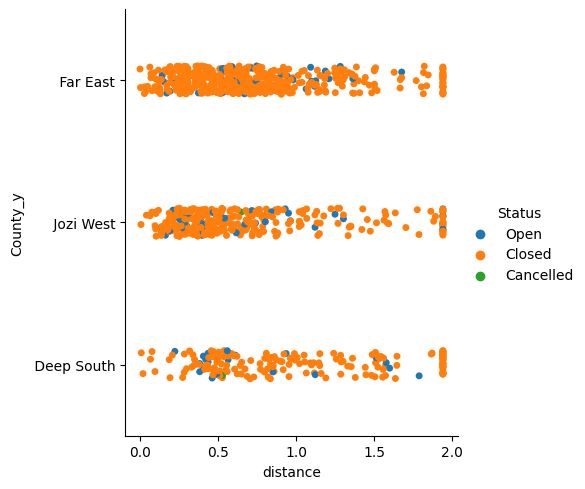

In [250]:
#Catplot showing the distances between boosters and sites upgraded - post the outliers management
sns.catplot(data=df_rec, x = 'distance', y = 'County_y', hue = 'Status')

# File Outputs

In [251]:
df_rec.to_excel(f"Output_{pd.Timestamp.now().strftime('%Y_%m_%d_%H_%M_%S')}.xlsx")

In [252]:
#Sort the boosters by distance with the closest first
df_rec.sort_values(["distance"], inplace=True)

In [253]:
#get boosters where the First Live is later than the booster requested date
df_rec.query("RequestedDate < First_Live", inplace=True)

In [254]:
df_rec.to_excel(f"Output_First live Post Booster_{pd.Timestamp.now().strftime('%Y_%m_%d_%H_%M_%S')}.xlsx")